In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/')

Mounted at /content/drive


In [ ]:
#Import the required datasets
df = pd.read_csv('./input/stackoverflow_full.csv')
df

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,73457,<35,No,Undergraduate,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1
73458,73458,>35,No,Undergraduate,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1
73459,73459,<35,No,Undergraduate,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1
73460,73460,<35,Yes,Undergraduate,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      73462 non-null  int64  
 1   Age             73462 non-null  object 
 2   Accessibility   73462 non-null  object 
 3   EdLevel         73462 non-null  object 
 4   Employment      73462 non-null  int64  
 5   Gender          73462 non-null  object 
 6   MentalHealth    73462 non-null  object 
 7   MainBranch      73462 non-null  object 
 8   YearsCode       73462 non-null  int64  
 9   YearsCodePro    73462 non-null  int64  
 10  Country         73462 non-null  object 
 11  PreviousSalary  73462 non-null  float64
 12  HaveWorkedWith  73399 non-null  object 
 13  ComputerSkills  73462 non-null  int64  
 14  Employed        73462 non-null  int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 8.4+ MB


In [ ]:
# Drop the unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'Employment', 'Country', 'HaveWorkedWith'])

In [ ]:
df.isnull().sum()

,0
Age,0
Accessibility,0
EdLevel,0
Gender,0
MentalHealth,0
MainBranch,0
YearsCode,0
YearsCodePro,0
PreviousSalary,0
ComputerSkills,0


In [ ]:
df.head(10)

,Age,Accessibility,EdLevel,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed
0,<35,No,Master,Man,No,Dev,7,4,51552.0,4,0
1,<35,No,Undergraduate,Man,No,Dev,12,5,46482.0,12,1
2,<35,No,Master,Man,No,Dev,15,6,77290.0,7,0
3,<35,No,Undergraduate,Man,No,Dev,9,6,46135.0,13,0
4,>35,No,PhD,Man,No,NotDev,40,30,160932.0,2,0
5,<35,No,Master,Man,No,Dev,9,2,38915.0,5,0
6,>35,No,Master,Man,No,Dev,26,18,77831.0,17,1
7,<35,No,Master,Man,No,NotDev,14,5,81319.0,4,0
8,>35,No,Undergraduate,Man,No,Dev,39,21,68507.0,3,0
9,>35,No,Master,Man,No,Dev,20,16,37752.0,6,0


In [ ]:
# Define custom mappings for each column
mappings = {
    'Age' : {'<35' : 0, '>35' : 1},
    'Accessibility': {'No': 0, 'Yes': 1},
    'EdLevel': {'NoHigherEd' : 0, 'Other' : 1, 'Undergraduate': 2, 'Master': 3, 'PhD': 4},
    'Gender': {'NonBinary': 0, 'Woman': 1, 'Man': 2},
    'MentalHealth': {'No': 0, 'Yes': 1},
    'MainBranch': {'NotDev': 0, 'Dev': 1}
}

# Apply custom label encoding using the mappings
for col, mapping in mappings.items():
    if col in df.columns:
        df[f'{col}_encoded'] = df[col].map(mapping)

# Drop the original columns
df = df.drop(columns=mappings.keys())

# Print the updated DataFrame
df.head()

,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed,Age_encoded,Accessibility_encoded,EdLevel_encoded,Gender_encoded,MentalHealth_encoded,MainBranch_encoded
0,7,4,51552.0,4,0,0,0,3,2,0,1
1,12,5,46482.0,12,1,0,0,2,2,0,1
2,15,6,77290.0,7,0,0,0,3,2,0,1
3,9,6,46135.0,13,0,0,0,2,2,0,1
4,40,30,160932.0,2,0,1,0,4,2,0,0


In [ ]:
X = df.drop(columns=['Employed'])
y = df.Employed

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

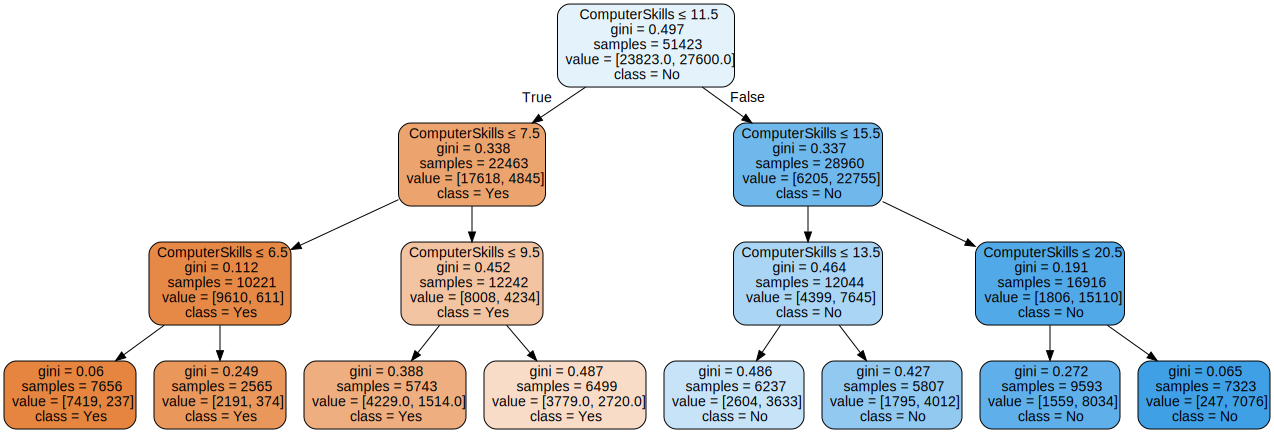

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names = ['YearsCode', 'YearsCodePro', 'PreviousSalary', 'ComputerSkills', 'Age_encoded', 'Accessibility_encoded', 'EdLevel_encoded', 'Gender_encoded', 'MentalHealth_encoded', 'MainBranch_encoded'],
                               class_names=['Yes', 'No'], filled = True,
                                rounded = True,
                                special_characters = True)
graph = graphviz.Source(dot_data)
graph.render('Gini')
graph

In [ ]:
# Check the score of the model
clf.score(X_test,y_test)

0.782204274241118

In [ ]:
# Save the graph in JPG format
graph.render('DecisionTree', format='jpg')

'DecisionTree.jpg'

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Re-train model with best parameters
best_clf = grid_search.best_estimator_

Best parameters: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.7851156432948406


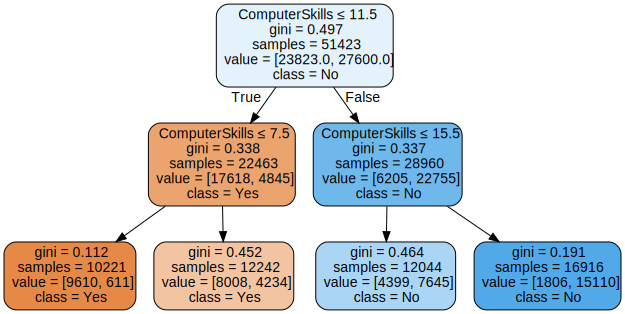

In [ ]:
dot_data_2 = tree.export_graphviz(best_clf, out_file=None,
                           feature_names=['YearsCode', 'YearsCodePro', 'PreviousSalary', 'ComputerSkills', 'Age_encoded',
                                          'Accessibility_encoded', 'EdLevel_encoded', 'Gender_encoded', 'MentalHealth_encoded', 'MainBranch_encoded'],
                           class_names=['Yes', 'No'], filled=True,
                           rounded=True,
                           special_characters=True)

# Create a graph from the dot data
graph_2 = graphviz.Source(dot_data_2)
graph_2.render('Gini')
graph_2

In [ ]:
# Save the graph in JPG format
graph_2.render('DecisionTree_2', format='jpg')

'DecisionTree_2.jpg'